<a href="https://colab.research.google.com/github/Nourhan-Hegazy/Cairo_Cyclist_Route_Planner/blob/main/Bachelor_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('/content/bike_dataset1.csv')
df.head()

,Unnamed: 0,length,highway,shadow,thermal comfort area/buffer,green_500,uv_cost,traffic_delay,traffic,green,...,poll_cost,# of intersections /node,intersection,intersection_cost,ux,uy,vx,vy,day,hour
0,0,19.939,primary,0.8,0.037828,0.002959,15.9512,5,0.5,0,...,14.95425,3,0,0.00000,31.246955,30.061833,31.246758,30.061778,2,17
1,1,54.061,footway,0.8,0.032967,0.002858,43.2488,2,0.2,0,...,32.43660,3,0,0.00000,31.246758,30.061778,31.247160,30.061565,2,17
2,2,15.659,primary,0.8,0.044747,0.002975,12.5272,0,0.0,0,...,6.26360,3,0,0.00000,31.247160,30.061565,31.247015,30.061501,2,17
3,3,34.135,secondary,0.6,0.059617,0.002910,20.4810,0,0.0,0,...,17.06750,4,1,40.97092,31.247015,30.061501,31.246949,30.061206,2,17
4,4,43.449,primary,0.6,0.059385,0.002875,26.0694,0,0.0,0,...,26.06940,3,0,0.00000,31.247015,30.061501,31.246590,30.061370,2,17


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   87 non-null     int64  
 1   length                       87 non-null     float64
 2   highway                      87 non-null     object 
 3   shadow                       87 non-null     float64
 4   thermal comfort area/buffer  87 non-null     float64
 5   green_500                    87 non-null     float64
 6   uv_cost                      87 non-null     float64
 7   traffic_delay                87 non-null     int64  
 8   traffic                      87 non-null     float64
 9   green                        87 non-null     int64  
 10  pollution_meter              87 non-null     float64
 11  gradient                     87 non-null     float64
 12  elevation_cost               87 non-null     float64
 13  poll_cost             

In [27]:
pd.unique(df['highway'])

array(['primary', 'footway', 'secondary', 'residential', 'tertiary'],
      dtype=object)

In [28]:
df = pd.get_dummies(df , columns = ['highway'])
df

,Unnamed: 0,length,shadow,thermal comfort area/buffer,green_500,uv_cost,traffic_delay,traffic,green,pollution_meter,...,uy,vx,vy,day,hour,highway_footway,highway_primary,highway_residential,highway_secondary,highway_tertiary
0,0,19.939,0.8,0.037828,0.002959,15.9512,5,0.5,0,29.9085,...,30.061833,31.246758,30.061778,2,17,0,1,0,0,0
1,1,54.061,0.8,0.032967,0.002858,43.2488,2,0.2,0,64.8732,...,30.061778,31.247160,30.061565,2,17,1,0,0,0,0
2,2,15.659,0.8,0.044747,0.002975,12.5272,0,0.0,0,15.6590,...,30.061565,31.247015,30.061501,2,17,0,1,0,0,0
3,3,34.135,0.6,0.059617,0.002910,20.4810,0,0.0,0,34.1350,...,30.061501,31.246949,30.061206,2,17,0,0,0,1,0
4,4,43.449,0.6,0.059385,0.002875,26.0694,0,0.0,0,43.4490,...,30.061501,31.246590,30.061370,2,17,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,8.822,1.0,0.000000,0.004793,8.8220,0,0.0,0,8.8220,...,30.059082,31.246950,30.059066,2,17,0,0,1,0,0
83,83,25.578,1.0,0.000000,0.004693,25.5780,0,0.0,0,25.5780,...,30.059066,31.246693,30.059126,2,17,0,0,1,0,0
84,84,33.747,1.0,0.000000,0.004646,33.7470,0,0.0,0,33.7470,...,30.059126,31.246355,30.059205,2,17,0,0,1,0,0
85,85,33.388,1.0,0.000000,0.004648,33.3880,0,0.0,0,33.3880,...,30.058720,31.244846,30.058797,2,17,0,0,1,0,0


In [29]:
df = df.drop(['Unnamed: 0'], axis = 1, index = None)
df

,length,shadow,thermal comfort area/buffer,green_500,uv_cost,traffic_delay,traffic,green,pollution_meter,gradient,...,uy,vx,vy,day,hour,highway_footway,highway_primary,highway_residential,highway_secondary,highway_tertiary
0,19.939,0.8,0.037828,0.002959,15.9512,5,0.5,0,29.9085,0.009935,...,30.061833,31.246758,30.061778,2,17,0,1,0,0,0
1,54.061,0.8,0.032967,0.002858,43.2488,2,0.2,0,64.8732,0.000391,...,30.061778,31.247160,30.061565,2,17,1,0,0,0,0
2,15.659,0.8,0.044747,0.002975,12.5272,0,0.0,0,15.6590,-0.023929,...,30.061565,31.247015,30.061501,2,17,0,1,0,0,0
3,34.135,0.6,0.059617,0.002910,20.4810,0,0.0,0,34.1350,0.005790,...,30.061501,31.246949,30.061206,2,17,0,0,0,1,0
4,43.449,0.6,0.059385,0.002875,26.0694,0,0.0,0,43.4490,0.011557,...,30.061501,31.246590,30.061370,2,17,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,8.822,1.0,0.000000,0.004793,8.8220,0,0.0,0,8.8220,-0.018871,...,30.059082,31.246950,30.059066,2,17,0,0,1,0,0
83,25.578,1.0,0.000000,0.004693,25.5780,0,0.0,0,25.5780,-0.073195,...,30.059066,31.246693,30.059126,2,17,0,0,1,0,0
84,33.747,1.0,0.000000,0.004646,33.7470,0,0.0,0,33.7470,-0.056135,...,30.059126,31.246355,30.059205,2,17,0,0,1,0,0
85,33.388,1.0,0.000000,0.004648,33.3880,0,0.0,0,33.3880,0.010570,...,30.058720,31.244846,30.058797,2,17,0,0,1,0,0


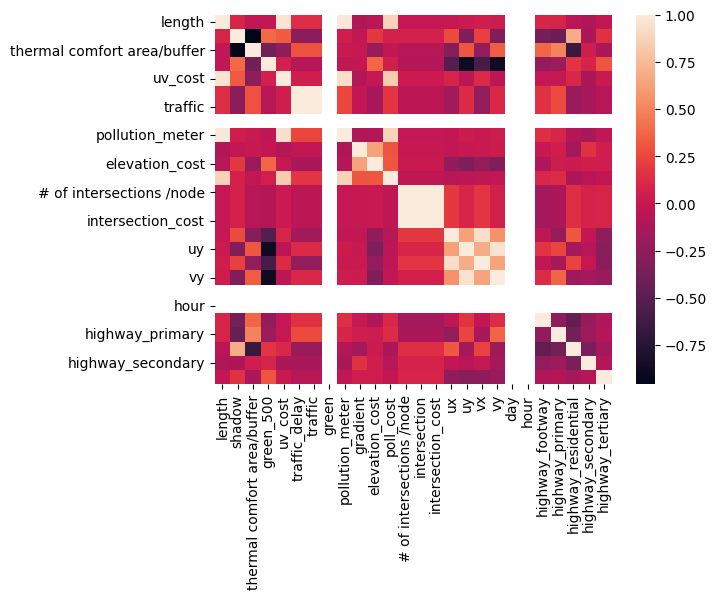

In [31]:
sns.heatmap(df.corr())
plt.show()

In [32]:
df.columns

Index(['length', 'shadow', 'thermal comfort area/buffer', 'green_500',
       'uv_cost', 'traffic_delay', 'traffic', 'green', 'pollution_meter',
       'gradient', 'elevation_cost', 'poll_cost', '# of intersections /node',
       'intersection', 'intersection_cost', 'ux', 'uy', 'vx', 'vy', 'day',
       'hour', 'highway_footway', 'highway_primary', 'highway_residential',
       'highway_secondary', 'highway_tertiary'],
      dtype='object')

In [33]:
dropped_poll_cost = df.drop(['poll_cost'], axis = 1, index = None)
dropped_poll_cost

,length,shadow,thermal comfort area/buffer,green_500,uv_cost,traffic_delay,traffic,green,pollution_meter,gradient,...,uy,vx,vy,day,hour,highway_footway,highway_primary,highway_residential,highway_secondary,highway_tertiary
0,19.939,0.8,0.037828,0.002959,15.9512,5,0.5,0,29.9085,0.009935,...,30.061833,31.246758,30.061778,2,17,0,1,0,0,0
1,54.061,0.8,0.032967,0.002858,43.2488,2,0.2,0,64.8732,0.000391,...,30.061778,31.247160,30.061565,2,17,1,0,0,0,0
2,15.659,0.8,0.044747,0.002975,12.5272,0,0.0,0,15.6590,-0.023929,...,30.061565,31.247015,30.061501,2,17,0,1,0,0,0
3,34.135,0.6,0.059617,0.002910,20.4810,0,0.0,0,34.1350,0.005790,...,30.061501,31.246949,30.061206,2,17,0,0,0,1,0
4,43.449,0.6,0.059385,0.002875,26.0694,0,0.0,0,43.4490,0.011557,...,30.061501,31.246590,30.061370,2,17,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,8.822,1.0,0.000000,0.004793,8.8220,0,0.0,0,8.8220,-0.018871,...,30.059082,31.246950,30.059066,2,17,0,0,1,0,0
83,25.578,1.0,0.000000,0.004693,25.5780,0,0.0,0,25.5780,-0.073195,...,30.059066,31.246693,30.059126,2,17,0,0,1,0,0
84,33.747,1.0,0.000000,0.004646,33.7470,0,0.0,0,33.7470,-0.056135,...,30.059126,31.246355,30.059205,2,17,0,0,1,0,0
85,33.388,1.0,0.000000,0.004648,33.3880,0,0.0,0,33.3880,0.010570,...,30.058720,31.244846,30.058797,2,17,0,0,1,0,0


In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import MeanSquaredError
def transformer_model(input_shape, output_shape, num_features, num_heads, num_layers, d_model, d_ff, dropout):
    # Define the input layer
    inputs = Input(shape=input_shape)

    # Define the input embedding layer
    embedding = Dense(d_model)(inputs)

    # Define the Transformer encoder layers
    for i in range(num_layers):
        attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        attn_output = attention(embedding, embedding)
        attn_output = Dropout(dropout)(attn_output)
        norm1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)
        feed_forward = Dense(d_ff, activation='relu')(norm1)
        feed_forward = Dense(d_model)(feed_forward)
        feed_forward = Dropout(dropout)(feed_forward)
        norm2 = LayerNormalization(epsilon=1e-6)(norm1 + feed_forward)
        embedding = norm2

    # Define the output layer
    output = Dense(output_shape)(embedding)

    # Define the model
    model = Model(inputs=inputs, outputs=output)

    return model

In [49]:
# Define the input and output shapes of the model
input_shape = (25, 1)
output_shape = 1

# Initialize the Transformer model
model = transformer_model(input_shape, output_shape, 25, 10, 2, 25, 2048, 0.1)


In [50]:
x_train, x_test, y_train, y_test = train_test_split(dropped_poll_cost, df[['poll_cost']], test_size=0.1)


In [52]:
#metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.mertrics.RootMeanSquaredError(), tf.keras.mertrics.MeanAbsoluteError(), tf.keras.mertrics.MeanSquaredLogarithmicError(), tf.keras.mertrics.LogCoshError()]
model.compile(loss = 'mape', optimizer='adam')

In [53]:
model.fit(x_train, y_train, batch_size= 4, epochs= 50)

Epoch 1/50
20/20 [==============================] - 5s 19ms/step - loss: 74.6931
Epoch 2/50
20/20 [==============================] - 0s 17ms/step - loss: 68.9433
Epoch 3/50
20/20 [==============================] - 0s 16ms/step - loss: 69.0789
Epoch 4/50
20/20 [==============================] - 0s 17ms/step - loss: 68.9587
Epoch 5/50
20/20 [==============================] - 0s 18ms/step - loss: 68.9386
Epoch 6/50
20/20 [==============================] - 0s 17ms/step - loss: 68.9325
Epoch 7/50
20/20 [==============================] - 0s 16ms/step - loss: 68.9327
Epoch 8/50
20/20 [==============================] - 0s 17ms/step - loss: 69.1154
Epoch 9/50
20/20 [==============================] - 0s 16ms/step - loss: 69.0260
Epoch 10/50
20/20 [==============================] - 0s 17ms/step - loss: 68.9443
Epoch 11/50
20/20 [==============================] - 0s 19ms/step - loss: 68.8871
Epoch 12/50
20/20 [==============================] - 0s 17ms/step - loss: 68.9633
Epoch 13/50
20/20 [======

In [39]:
results = model.evaluate(x_test, y_test, batch_size = 1)
print(results)

9/9 [==============================] - 1s 4ms/step - loss: 100.1899
100.18993377685547
